In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import nibabel as nib
from nilearn import surface, plotting, datasets

/Users/katherine.b/Library/Python/3.8/lib/python/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
age_10 = '/Users/katherine.b/Dropbox/Projects/deltaABCD_clustering/resources/Age10_DevelopmentMap_Derivatives.pscalar.nii'
glasser = '/Users/katherine.b/Dropbox/Mac/Downloads/glasser360MNI.nii.gz'

In [3]:
glasser_nii = nib.load(glasser)
glasser_arr = glasser_nii.get_fdata()

In [4]:
np.unique(glasser_arr).shape

(361,)

In [5]:
cifti = nib.load(age_10)

In [6]:
age_fx = np.asanyarray(cifti.get_fdata())

In [7]:
age_fx[0,0]

-0.03196294605731964

In [8]:
age_arr = np.zeros_like(glasser_arr)
for i in range(0,age_fx.shape[1]):
    temp = np.where(glasser_arr == i+1, age_fx[0,i], 0)
    age_arr += temp

<AxesSubplot:ylabel='Count'>

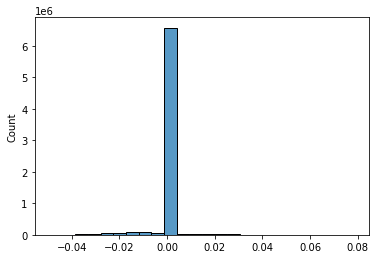

In [9]:
sns.histplot(age_arr.flatten())

In [10]:
age_nimg = nib.Nifti1Image(age_arr, glasser_nii.affine)

In [11]:
sns.crayons

{'Almond': '#EFDECD',
 'Antique Brass': '#CD9575',
 'Apricot': '#FDD9B5',
 'Aquamarine': '#78DBE2',
 'Asparagus': '#87A96B',
 'Atomic Tangerine': '#FFA474',
 'Banana Mania': '#FAE7B5',
 'Beaver': '#9F8170',
 'Bittersweet': '#FD7C6E',
 'Black': '#000000',
 'Blue': '#1F75FE',
 'Blue Bell': '#A2A2D0',
 'Blue Green': '#0D98BA',
 'Blue Violet': '#7366BD',
 'Blush': '#DE5D83',
 'Brick Red': '#CB4154',
 'Brown': '#B4674D',
 'Burnt Orange': '#FF7F49',
 'Burnt Sienna': '#EA7E5D',
 'Cadet Blue': '#B0B7C6',
 'Canary': '#FFFF99',
 'Caribbean Green': '#00CC99',
 'Carnation Pink': '#FFAACC',
 'Cerise': '#DD4492',
 'Cerulean': '#1DACD6',
 'Chestnut': '#BC5D58',
 'Copper': '#DD9475',
 'Cornflower': '#9ACEEB',
 'Cotton Candy': '#FFBCD9',
 'Dandelion': '#FDDB6D',
 'Denim': '#2B6CC4',
 'Desert Sand': '#EFCDB8',
 'Eggplant': '#6E5160',
 'Electric Lime': '#CEFF1D',
 'Fern': '#71BC78',
 'Forest Green': '#6DAE81',
 'Fuchsia': '#C364C5',
 'Fuzzy Wuzzy': '#CC6666',
 'Gold': '#E7C697',
 'Goldenrod': '#FCD975',


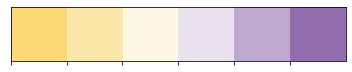

In [12]:
pal = sns.blend_palette(['#FCD975', '#FFFFFF', '#926EAE'])
cmap = sns.blend_palette(['#FCD975', '#FFFFFF', '#926EAE'], as_cmap=True)
sns.palplot(pal)

/Users/katherine.b/Library/Python/3.8/lib/python/site-packages/nilearn/surface/surface.py:467: RuntimeWarning: Mean of empty slice
  texture = np.nanmean(all_samples, axis=2)
/Users/katherine.b/Library/Python/3.8/lib/python/site-packages/nilearn/surface/surface.py:467: RuntimeWarning: Mean of empty slice
  texture = np.nanmean(all_samples, axis=2)


(<Figure size 288x324 with 5 Axes>,
 [<Axes3DSubplot:>,
  <Axes3DSubplot:>,
  <Axes3DSubplot:>,
  <Axes3DSubplot:>,
  <AxesSubplot:>])

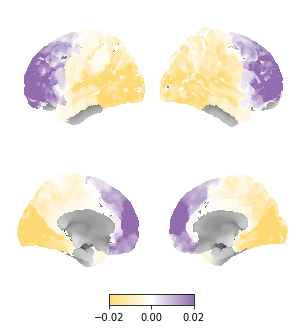

In [13]:
plotting.plot_img_on_surf(age_nimg, threshold=0.0001, cmap=cmap, vmax=0.02)

In [15]:
age_nimg.to_filename('../sydnor_age10_fx.nii')

In [14]:
sa_axis_path = '/Users/katherine.b/Dropbox/Mac/Downloads/SensorimotorAssociation.Axis.Glasser360.pscalar.nii'

In [15]:
sa_axis_gii = nib.load(sa_axis_path)
sa_axis_arr = sa_axis_gii.get_fdata()

In [16]:
sa_axis_arr.shape

(1, 360)

In [17]:
sa_arr = np.zeros_like(glasser_arr)
for i in range(0,age_fx.shape[1]):
    temp = np.where(glasser_arr == i+1, sa_axis_arr[0,i], 0)
    sa_arr += temp

<AxesSubplot:ylabel='Count'>

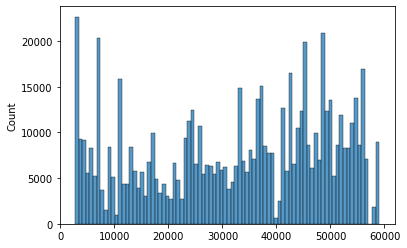

In [18]:
sa_nimg = nib.Nifti1Image(sa_arr, glasser_nii.affine)
sns.histplot(sa_arr.flatten()[sa_arr.flatten() != 0])

(<Figure size 288x324 with 5 Axes>,
 [<Axes3DSubplot:>,
  <Axes3DSubplot:>,
  <Axes3DSubplot:>,
  <Axes3DSubplot:>,
  <AxesSubplot:>])

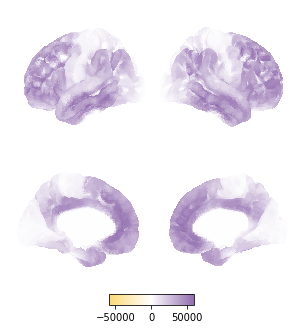

In [71]:
plotting.plot_img_on_surf(
    sa_nimg, 
    #threshold=0.0001, 
    cmap=cmap, 
    #vmax=0.02,
    symmetric_cmap=False
)

In [20]:
fsaverage = datasets.fetch_surf_fsaverage()

In [21]:
sa_left = surface.vol_to_surf(sa_nimg, fsaverage.pial_left)

In [22]:
!pwd

/Users/katherine.b/Dropbox/Projects/deltaABCD_clustering/notebooks


In [25]:
sa_nimg.to_filename('../resources/sensorimotor_association_axis.nii')

In [23]:
desikan = '/Users/katherine.b/nilearn_data/neurovault/collection_1446/image_23262.nii.gz'

/Users/katherine.b/Library/Python/3.8/lib/python/site-packages/nilearn/plotting/img_plotting.py:341: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()
/Users/katherine.b/Library/Python/3.8/lib/python/site-packages/nilearn/_utils/niimg.py:61: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(


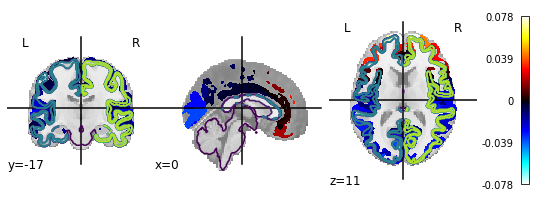

In [24]:
g = plotting.plot_stat_map(age_nimg)
g.add_contours(desikan)

In [25]:
dk_nii = nib.load(desikan)
dk_arr = dk_nii.get_fdata()

In [26]:
from nilearn.image import resample_to_img

In [42]:
resampled_age = resample_to_img(age_nimg, dk_nii, )
resampled_sa = resample_to_img(sa_nimg, dk_nii, )

/Users/katherine.b/Library/Python/3.8/lib/python/site-packages/nilearn/image/resampling.py:598: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(data[all_img + ind], A, b, target_shape,


In [43]:
resampled_sa.affine

array([[  -1.,    0.,    0.,  128.],
       [   0.,    0.,    1., -128.],
       [   0.,   -1.,    0.,  128.],
       [   0.,    0.,    0.,    1.]])

In [44]:
dk_nii.affine

array([[  -1.,    0.,    0.,  128.],
       [   0.,    0.,    1., -128.],
       [   0.,   -1.,    0.,  128.],
       [   0.,    0.,    0.,    1.]])

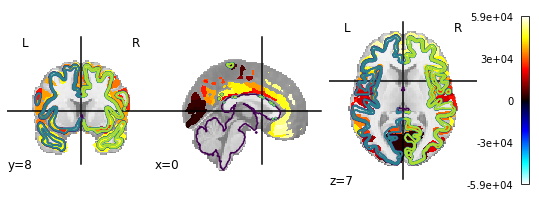

In [45]:
g = plotting.plot_stat_map(resampled_sa)
g.add_contours(desikan)

In [48]:
resampled_age_arr = resampled_age.get_fdata()
resampled_saa_arr = resampled_sa.get_fdata()

In [32]:
nifti_mapping = pd.read_pickle('/Volumes/projects_herting/LABDOCS/Personnel/Katie/deltaABCD_clustering/data/variable_to_nifti_mapping.pkl')

In [47]:
np.unique(dk_arr)
np.nanmean(resampled_age_arr[np.where(dk_arr == 2035)])

-0.0020691364669100424

In [64]:
rnd_vars = nifti_mapping.filter(like="dmri_rsirndgm_cdk", axis=0)

rnd_df = pd.DataFrame(index=rnd_vars.index)
for i in rnd_vars.index:
    #regn = i.split('_')[-1]
    val = nifti_mapping.loc[i]['atlas_value']
    rnd_df.at[i, 'SA_avg'] = np.nanmean(resampled_saa_arr[np.where(dk_arr == val)])
    rnd_df.at[i, 'age_avg'] = np.nanmean(resampled_age_arr[np.where(dk_arr == val)])
    
rnd_df = rnd_df.sort_values('SA_avg')
rnd_df['SA_rank'] = list(range(1,69))

In [63]:
def series_2_nifti(series_in, out_dir, save=False):
    nifti_mapping = pd.read_pickle('/Volumes/projects_herting/LABDOCS/Personnel/Katie/deltaABCD_clustering/data/variable_to_nifti_mapping.pkl')
    series = series_in.copy()
    series.index = [x.split('.')[0] for x in series.index]
    
    #vmin = series.quantile(0.25)

    # list of measures to plot
    measures = {'cortical-thickness': 'smri_thick_cdk_.*',
                'cortical-gwcontrast': 'smri_t1wcnt_cdk_.*',
                'cortical-area': 'smri_area_cdk_.*',
                'cortical-volume': 'smri_vol_cdk_.*', 
                'subcortical-volume': 'smri_vol_scs_.*', 
                'subcortical-RND': 'dmri_rsirnd_scs_.*',
                'subcortical-RNI': 'dmri_rsirni_scs_.*',
                'cortical-RND': 'dmri_rsirndgm_.*',
                'cortical-RNI': 'dmri_rsirnigm_.*',
                'cortical-BOLD-variance': 'rsfmri_var_cdk_.*',
                'tract-volume': 'dmri_dtivol_fiberat_.*', 
                'tract-FA': 'dmri_dtifa_fiberat_.*', 
                'tract-MD': 'dmri_dtimd_fiberat_.*',
                'tract-LD': 'dmri_dtild_fiberat_.*', 
                'tract-TD': 'dmri_dtitd_fiberat_.*', 
                'tract-RND': 'dmri_rsirnd_fib_.*',
                'tract-RNI': 'dmri_rsirni_fib_.*'}
    fc_cort_var = series.filter(regex='.*fmri.*_c_.*').index
    fc_scor_var = series.filter(regex='.*fmri.*_cor_.*').index
    fmri_var_var = series.filter(regex='.*fmri.*_var_.*').index

    #morph_var = df[df['concept'] == 'macrostructure'].index
    #cell_var = df[df['concept'] == 'microstructure'].index
    func_var = list(fmri_var_var) 
    conn_var = list(fc_cort_var) + list(fc_scor_var)

    conn_measures = {'cortical-network-connectivity': 'rsfmri_c_ngd_.*',
                'subcortical-network-connectivity': 'rsfmri_cor_ngd_.*_scs_.*',}

    # let's plot APC on brains pls
    for measure in measures.keys():
        #print(measure, measures[measure])
        #print(measure)

        meas_df = series.filter(regex=measures[measure], axis=0)
        meas_vars = meas_df.index

        #meas_df.drop_duplicates(inplace=True)
        #print(len(meas_df.index))
        #print(meas_df.head())
        if len(meas_df[meas_df != 0]) == 0:
            pass
        else:
            if 'tract' in measure:
                print('tract')
                fibers = nifti_mapping.filter(regex=measures[measure], axis=0).index
                var = fibers[0]
                tract_fname = nifti_mapping.loc[var]['atlas_fname']
                tract_nii = nib.load(tract_fname)
                tract_arr = tract_nii.get_fdata()
                #print(np.unique(tract_arr))
                avg = series.loc[f'{var}']
                tract_arr *= avg
                all_tracts_arr = np.zeros(tract_arr.shape)
                all_tracts_arr += tract_arr
                for var in fibers[1:]:    
                    tract_fname = nifti_mapping.loc[var]['atlas_fname']
                    if type(tract_fname) is str:
                        try:
                            tract_nii = nib.load(tract_fname)
                            tract_arr = tract_nii.get_fdata()
                            #print(np.unique(tract_arr))
                            avg = series.loc[f'{var}']
                            tract_arr *= avg
                            all_tracts_arr += tract_arr
                        except Exception as e:
                            pass
                    else:
                        pass
                meas_nimg = nib.Nifti1Image(all_tracts_arr, tract_nii.affine)
                if save:
                    meas_nimg.to_filename(f'{out_dir}/{series.name}.nii')
                
            else:
                print('cortex')
                #print(nifti_mapping.loc[meas_vars]['atlas_fname'])
                atlas_fname = nifti_mapping.loc[meas_vars]['atlas_fname'].unique()[0]
                #print(atlas_fname)
                atlas_nii = nib.load(atlas_fname)
                atlas_arr = atlas_nii.get_fdata()
                plotting_arr = np.zeros(atlas_arr.shape)
                for i in meas_df.index:
                    if i in nifti_mapping.index:
                        value = nifti_mapping.loc[i]['atlas_value']
                        
                        #print(i, value)
                        if value is np.nan:
                            pass
                        
                        else:
                            val = series.at[i]
                            #print(avg, value, atlas_arr.shape)
                            plotting_arr[np.where(atlas_arr == value)] = val
                    else:
                        pass
                
                meas_nimg = nib.Nifti1Image(plotting_arr, atlas_nii.affine)
                #print(np.mean(plotting_arr))
                if save:
                    meas_nimg.to_filename(f'{out_dir}/{series.name}.nii')

    
    return meas_nimg

In [68]:
sa_rank = series_2_nifti(rnd_df['SA_rank'], '../output', save=False)

cortex


(<Figure size 288x324 with 5 Axes>,
 [<Axes3DSubplot:>,
  <Axes3DSubplot:>,
  <Axes3DSubplot:>,
  <Axes3DSubplot:>,
  <AxesSubplot:>])

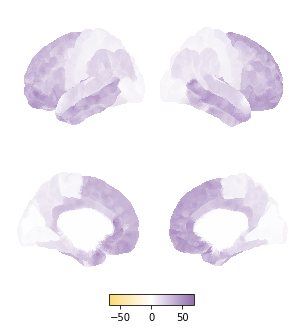

In [70]:
plotting.plot_img_on_surf(sa_rank, cmap=cmap)

In [72]:
rni_vars = nifti_mapping.filter(like="dmri_rsirnigm_cdk", axis=0)

rni_df = pd.DataFrame(index=rni_vars.index)
for i in rni_vars.index:
    #regn = i.split('_')[-1]
    val = nifti_mapping.loc[i]['atlas_value']
    rni_df.at[i, 'SA_avg'] = np.nanmean(resampled_saa_arr[np.where(dk_arr == val)])
    rni_df.at[i, 'age_avg'] = np.nanmean(resampled_age_arr[np.where(dk_arr == val)])
    
rni_df = rni_df.sort_values('SA_avg')
rni_df['SA_rank'] = list(range(1,69))

In [73]:
var_vars = nifti_mapping.filter(like="rsfmri_var_cdk", axis=0)

var_df = pd.DataFrame(index=var_vars.index)
for i in var_vars.index:
    #regn = i.split('_')[-1]
    val = nifti_mapping.loc[i]['atlas_value']
    var_df.at[i, 'SA_avg'] = np.nanmean(resampled_saa_arr[np.where(dk_arr == val)])
    var_df.at[i, 'age_avg'] = np.nanmean(resampled_age_arr[np.where(dk_arr == val)])
    
var_df = var_df.sort_values('SA_avg')
var_df['SA_rank'] = list(range(1,69))

In [75]:
rni_df

,SA_avg,age_avg,SA_rank
dmri_rsirnigm_cdk_pcclh,1886.682350,-0.025384,1
dmri_rsirnigm_cdk_cnlh,2815.554500,-0.016142,2
dmri_rsirnigm_cdk_cnrh,2960.284955,-0.017391,3
dmri_rsirnigm_cdk_pccrh,3064.538684,-0.029561,4
dmri_rsirnigm_cdk_lgrh,4769.030594,-0.022211,5
...,...,...,...
dmri_rsirnigm_cdk_raclh,41083.852155,0.007069,64
dmri_rsirnigm_cdk_moflh,42208.285605,0.017908,65
dmri_rsirnigm_cdk_loflh,42583.509357,0.017094,66
dmri_rsirnigm_cdk_mofrh,44743.015557,0.014626,67


In [76]:
thk_vars = nifti_mapping.filter(like="smri_thick_cdk", axis=0)

thk_df = pd.DataFrame(index=thk_vars.index)
for i in thk_vars.index:
    #regn = i.split('_')[-1]
    val = nifti_mapping.loc[i]['atlas_value']
    thk_df.at[i, 'SA_avg'] = np.nanmean(resampled_saa_arr[np.where(dk_arr == val)])
    thk_df.at[i, 'age_avg'] = np.nanmean(resampled_age_arr[np.where(dk_arr == val)])
    
thk_df = thk_df.sort_values('SA_avg')
thk_df['SA_rank'] = list(range(1,69))

In [78]:

PROJ_DIR = "/Volumes/projects_herting/LABDOCS/Personnel/Katie/deltaABCD_SAaxis//"
DATA_DIR = "data/"
FIGS_DIR = "figures/"
OUTP_DIR = "output/"

In [80]:
from os.path import join

In [81]:
thk_df.to_csv(join(PROJ_DIR, OUTP_DIR, 'smri_thick_age-SA.csv'))
var_df.to_csv(join(PROJ_DIR, OUTP_DIR, 'rsfmri_var_age-SA.csv'))
rni_df.to_csv(join(PROJ_DIR, OUTP_DIR, 'dmri_rsirnigm_age-SA.csv'))
rnd_df.to_csv(join(PROJ_DIR, OUTP_DIR, 'dmri_rsirndgm_age-SA.csv'))